In [1]:
#http://127.0.0.1/flow.tgz

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
data = keras.datasets.fashion_mnist

import os
import PIL
import PIL.Image

#import tensorflow.datasets as tfds

print(tf.__version__)

import pathlib

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_url = "http://127.0.0.1/train.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

#(train_images, train_labels), (test_images, test_labels) = data.load_data()
#cloth and angleboot are not the format for CNN model. There are just array of image. No label or other information for CNN
#cloth = list(data_dir.glob('cloth/*'))
#angleboot = list(data_dir.glob('ankleboot/*'))


2.3.0
24


In [2]:
#print(image_count)
#PIL.Image.open(str(cloth[2]))


In [3]:
#for i in range(12):
#    #plt.grid(False)
#    ax = plt.subplot(3, 4, i + 1)
#    plt.imshow(PIL.Image.open(str(angleboot[i])), cmap=plt.cm.binary)
#    #plt.xlabel("The label name: " + class_names[train_labels[i]])
#    plt.title("The label : " + str(i))
#    plt.ax="off"
#    #plt.show()
   

In [4]:
batch_size = 32
img_height = 28
img_width = 28
# train_ds and val_ds are what we prepare for CNN model
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 24 files belonging to 2 classes.
Using 20 files for training.
Found 24 files belonging to 2 classes.
Using 4 files for validation.


['angleboot', 'cloth']


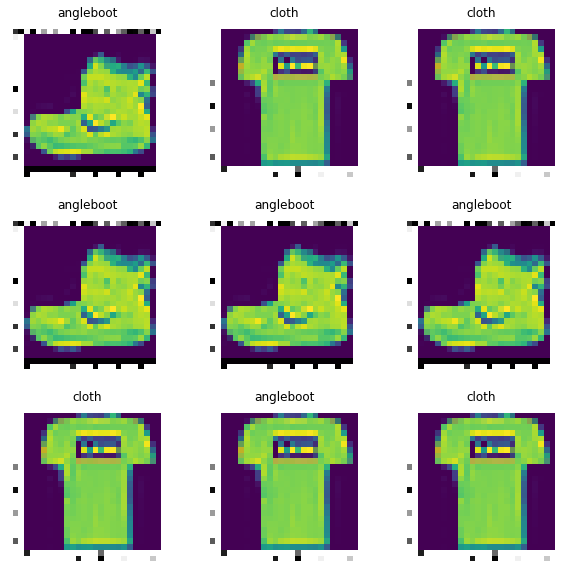

In [5]:
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 28, 28, 3)
(20,)


In [27]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [29]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [31]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
1/1 [==============================] - 0s 180ms/step - loss: 1.6260 - accuracy: 0.0000e+00 - val_loss: 1.5186 - val_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 72ms/step - loss: 1.5175 - accuracy: 0.1000 - val_loss: 1.4392 - val_accuracy: 0.5000
Epoch 3/3
1/1 [==============================] - 0s 63ms/step - loss: 1.4400 - accuracy: 0.5000 - val_loss: 1.3656 - val_accuracy: 0.5000
